In [1]:
#coding=utf-8
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
import random

% matplotlib inline

/Users/yixin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
np.random.seed(123)

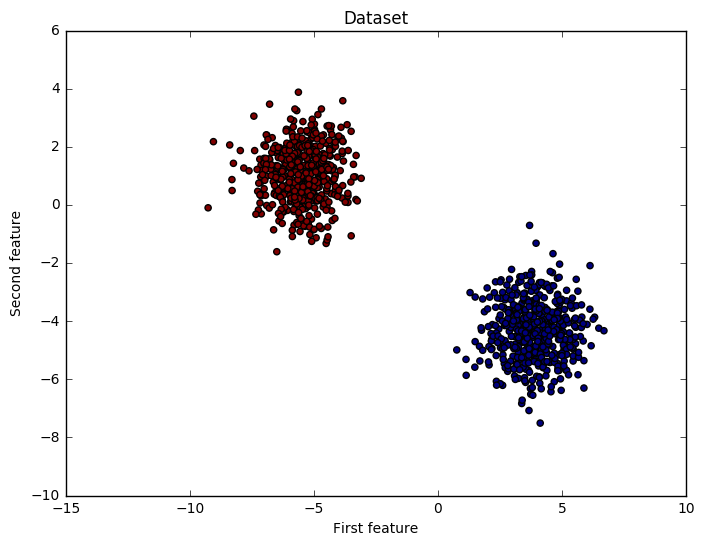

In [3]:
X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [4]:
y_true = y_true[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

In [77]:
class LogisticRegression(object):
    def __init__(self, norm=None):
        self.norm = norm
        
    def sigmod(self, raw):
        return 1.0 / (1 + np.exp(-raw))
    
    def l1_norm(self, raw):
        norm_ = [1 if v > 0.0 else -1 if v < 0.0 else random.uniform(-1,1) for v in list(raw)]
        return np.array(norm_)[:, np.newaxis]
    
    def fit(self, X, y, learning_rate=0.01, n_iters=1000, tol=0.0001, norm=None, lamd=0.1):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(shape=(n_features, 1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            y_pre = self.sigmod(np.dot(X, self.weights) + self.bias)
            
            cost = (-1.0 / n_samples) * np.sum(y * np.log(y_pre) + (1-y)*np.log(1-y_pre))
            
#             if len(costs) > 0 and abs(costs[-1] - cost) < tol:
#                 print 111
#                 break
            
            costs.append(cost)
            
            if i % 100 == 0:
                print 'cost after iteration {} : {}'.format(i, cost)
                
            if norm == 'l2':
                normalise = 1.0 / n_samples * lamd * self.weights
            elif norm == 'l1':
                normalise = 1.0 / n_samples * lamd * self.l1_norm(self.weights)
            else:
                normalise = 0.0
            
            dw = 1.0 / n_samples * np.dot(X.T, y_pre - y) + normalise
            db = 1.0 / n_samples * np.sum(y_pre - y)
            
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
        
        return self.weights, self.bias, costs
        
    def predict_prob(self, X):
        return self.sigmod(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X):
        pres = self.predict_prob(X)
        y_pre_label = [1 if v > 0.5 else 0 for v in pres]
        
        return np.array(y_pre_label)[:, np.newaxis]

cost after iteration 0 : 0.69314718056
cost after iteration 100 : 0.0465328899741
cost after iteration 200 : 0.0240721204314
cost after iteration 300 : 0.0163731910589
cost after iteration 400 : 0.0124646229479
cost after iteration 500 : 0.010092907035
600


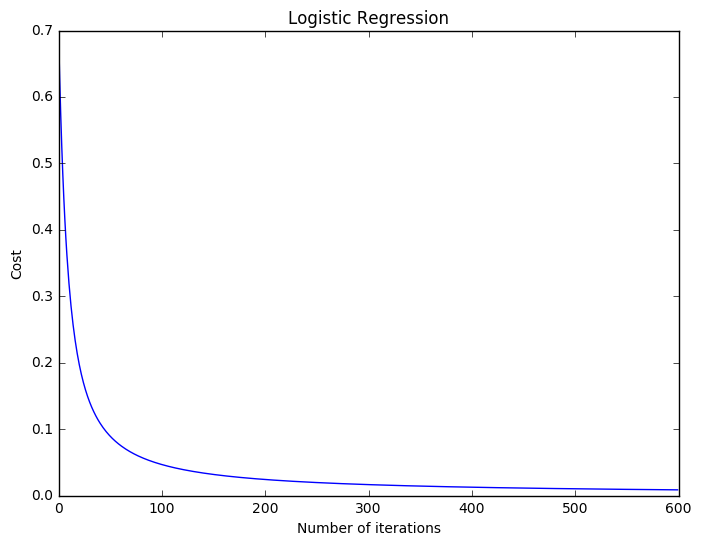

In [78]:
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.fit(X_train, y_train, n_iters=600, learning_rate=0.009, norm='l1')
print len(costs)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Logistic Regression")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

### my

In [40]:
class LogisticRegression(object):
    
    def sigmod(self, raw):
        return 1.0 /(1 + np.exp(-raw))
    
    def l1_norm(self, raw):
        return np.array([1 if v > 0 else -1 if v < 0 else random.uniform(-1,1) for v in list(raw)])[:, np.newaxis]
    
    def fit(self, X, y,n_iters=10, learning_rate=0.1, norm=None):
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features, 1))
        self.bias = 0
        costs = []
        for i in range(n_iters):
            pre = self.sigmod(np.dot(X, self.weights) + self.bias)
            cost = -1.0 / n_samples * np.sum(y * np.log(pre) + (1-y)*np.log(1-pre))
            costs.append(cost)
            
            if norm is None:
                norm_w = 0.0
                norm_b = 0.0
            elif norm == 'l1':
                norm_w = self.l1_norm(self.weights)
                norm_b = self.l1_norm([self.bias])[0]
            else:
                norm_b = self.bias
                norm_w = self.weights
            
            dw = 1.0 / n_samples * (np.dot(X.T, pre - y) + norm_w)
            db = 1.0 / n_samples * (np.sum(pre - y) + norm_b)
            
#             print dw.shape, norm_w.shape
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
            
        return self.weights, self.bias, costs
    
    def predict_prob(self, x):
        pres = self.sigmod(np.dot(x.T,self.weights) + self.bias)
        return pres
    
    def predict(self, x):
        pres = self.predict_prob(x)
        return [1 if v > 0.5 else 0 for v in pres]

600


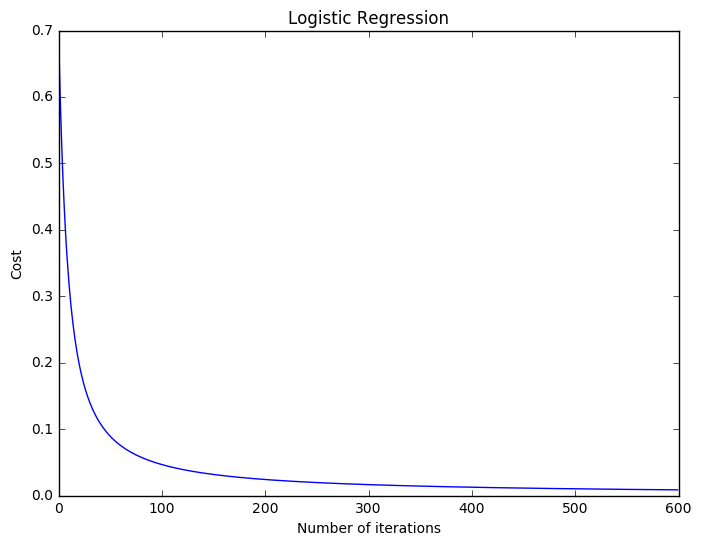

In [41]:
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.fit(X_train, y_train, n_iters=600, learning_rate=0.009, norm=None)
print len(costs)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Logistic Regression")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [23]:
X_train.shape

(750, 2)

### 3

In [67]:
class LogisticRegression(object):
    def sigmod(self, raw):
        return 1 / (1 + np.exp(-raw))
    
    def l1_norm(self, raw):
        ans = [1 if v > 0 else -1 if v < 0 else random.uniform(-1, 1) for v in list(raw)]
        return np.array(ans)[:,np.newaxis]
    
    def fit(self, x, y, norm=None, n_iters=10, learning_rate=0.1):
        n_samples, n_features = x.shape
        self.weights = np.zeros(shape=(n_features, 1))
        self.bias = 0.0
        
        costs = []
        for i in range(n_iters):
            y_pre = self.sigmod(np.dot(x, self.weights) + self.bias)
            cost = -1.0 / n_samples * np.sum(y*np.log(y_pre) + (1-y_pre)*np.log(1-y_pre))
            costs.append(cost)
            
            if norm == 'l1':
                normalise = self.l1_norm(self.weights)
                normb = self.l1_norm([self.bias])[0]
            elif norm == 'l2':
                normalise = self.weights
                normb = self.bias
            else:
                normalise = 0.0
                normb = 0.0
                
            dw = 1.0 / n_samples * (np.dot(x.T, y_pre - y) + normalise)
            db = 1.0 / n_samples * (np.sum(y_pre - y) + normb)
            
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
        
        return self.weights, self.bias, costs
    
    def predict_prob(self, x):
        pres = self.sigmod(np.dot(x, self.weights) + self.bias)
        return pres
    
    def predict(self, x):
        pres = self.predict_prob(x)
        return np.array([1 if v > 0.5 else 0 for v in pres])[:, np.newaxis]
            
            

600


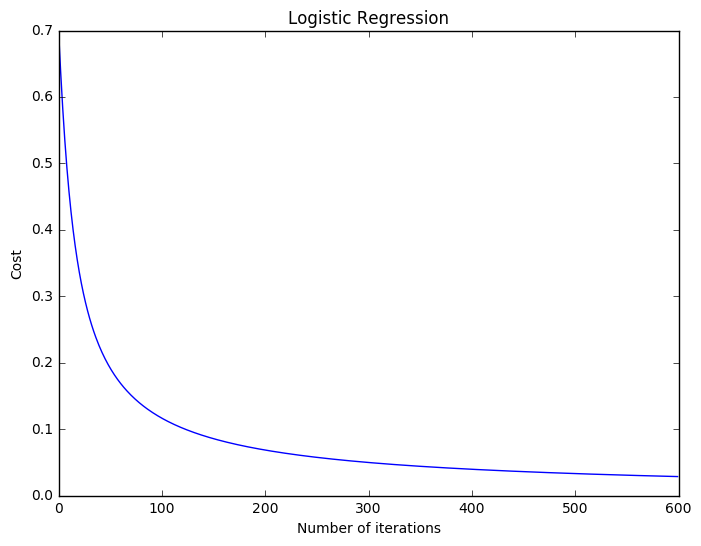

In [68]:
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.fit(X_train, y_train, n_iters=600, learning_rate=0.009, norm=None)
print len(costs)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Logistic Regression")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [64]:
np.array([testa, 1-testa])#[:, np.newaxis]

array([[[ 1],
        [ 2]],

       [[ 0],
        [-1]]])

In [62]:
1-testa

array([[ 0],
       [-1]])